<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Project%232_RF%20(standalone)%20and%20LSTM%20based%20on%20UNSW-NB15_rev.2(01062023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest (RF) based on UNSW-NB15 dataset**

In [19]:
import pandas as pd
import numpy as np

In [20]:
dataset = pd.read_csv("dataset_P2.2.csv")
dataset.shape
dataset.isnull().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
Class                0
dtype: int64

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [22]:
dataset["Class"].unique()

array([0, 2, 1, 5, 8, 7, 4, 3, 9, 6])

In [23]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


**Data Preprocessing**

In [25]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.000000e+00 1.214780e-01 6.000000e+00 ... 1.000000e+00 1.000000e+00
  0.000000e+00]
 [2.000000e+00 6.499020e-01 1.400000e+01 ... 1.000000e+00 6.000000e+00
  0.000000e+00]
 [3.000000e+00 1.623129e+00 8.000000e+00 ... 2.000000e+00 6.000000e+00
  0.000000e+00]
 ...
 [1.753390e+05 9.000000e-06 2.000000e+00 ... 3.000000e+00 1.200000e+01
  0.000000e+00]
 [1.753400e+05 9.000000e-06 2.000000e+00 ... 3.000000e+01 3.000000e+01
  0.000000e+00]
 [1.753410e+05 9.000000e-06 2.000000e+00 ... 3.000000e+01 3.000000e+01
  0.000000e+00]]
[0 0 0 ... 6 6 6]


In [26]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 56000, 6: 40000, 4: 33393, 5: 18184, 3: 12264, 7: 10491, 1: 2000, 2: 1746, 8: 1133, 9: 130})


In [27]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 56000, 2: 56000, 1: 56000, 5: 56000, 8: 56000, 7: 56000, 4: 56000, 3: 56000, 9: 56000, 6: 56000})


In [28]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Random Forest (RF) for 10 class classifications**

In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
y_test_prediction = rf.predict(X_test)

In [30]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[10245   137     2     0    24   821     0    20    27     1]
 [    0  4312  5055  1765    65    40     0    43    63     0]
 [    0   329  8858  1196   225   177     0   223   110   107]
 [    0   782  4662  3402  1553   168     0   223   300   129]
 [    0   315  1840  2259  5197   353     0   437   374   522]
 [    3    93   565   348    57  9570     0   192   304    42]
 [    0     3    39    47    95    24 10818     9    17    22]
 [    0   188  1236   489    35    57     0  8905   186    33]
 [    0     0     0    15     0   250     0  1208  9639     0]
 [    0     0     0     0    12     0     0   303   800 10035]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95     11277
           1       0.70      0.38      0.49     11343
           2       0.40      0.79      0.53     11225
           3       0.36      0.30      0.33     11219
           4       0.72      0.46      0.56     11297
   

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(8,6.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='copper')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])

  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees

  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Random Forest


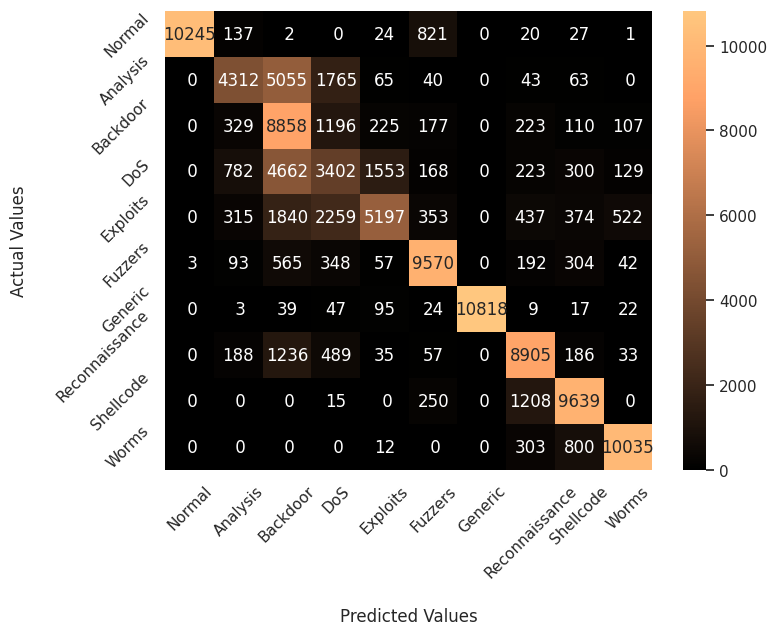

In [31]:
print("Confusion Matrix of Random Forest") 
conf_mat(y_test, y_test_prediction)

In [32]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1)

In [16]:
performance("Random Forest",y_test, y_test_prediction)

Model Name is : Random Forest
Accuracy : 72.59642857142858
Precision : 75.64948121844265
Recall : 72.59642857142858
F1-Score : 0.725846501886908


AUC: 0.95


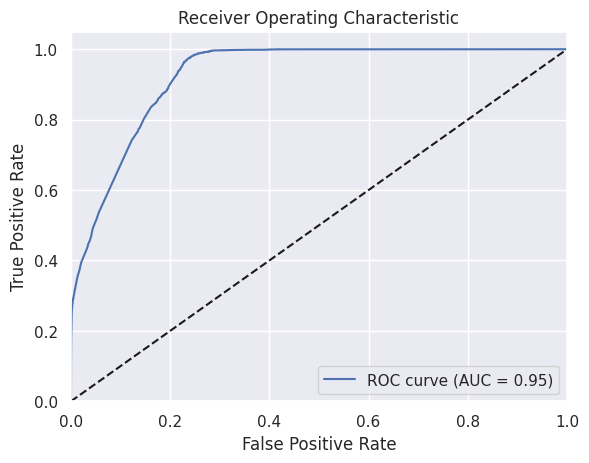

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Compute the predicted probabilities
y_test_probabilities = rf.predict_proba(X_test)

# Compute the AUC
auc = roc_auc_score(y_test, y_test_probabilities, multi_class='ovr')
print("AUC: {:.2f}".format(auc))

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probabilities[:, 1], pos_label=1)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

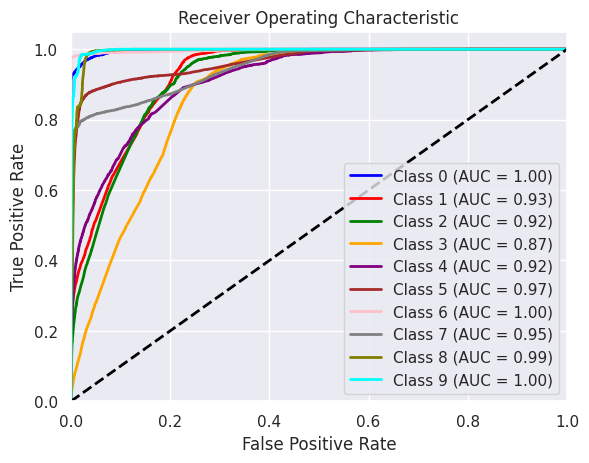

In [33]:
# Compute the AUC and ROC curve
n_classes = len(np.unique(y_test))
y_test_encoded = LabelEncoder().fit_transform(y_test)

y_scores = rf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded, y_scores[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**LSTM for 10 class classifications based on UNSW-NB15 dataset**

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [12]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert the target variables to categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train the model
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=15, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))

# Evaluate the model
score, acc = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

#Make predictions with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Convert categorical target variables back to class labels
y_true = np.argmax(y_test, axis=1)
predicted_classes = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Generate classification report
cr = classification_report(y_true, predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/15
14000/14000 [==============================] - 322s 22ms/step - loss: 0.9329 - accuracy: 0.6414 - val_loss: 0.8039 - val_accuracy: 0.6889
Epoch 2/15
14000/14000 [==============================] - 300s 21ms/step - loss: 0.7829 - accuracy: 0.6921 - val_loss: 0.7572 - val_accuracy: 0.6981
Epoch 3/15
14000/14000 [==============================] - 312s 22ms/step - loss: 0.7480 - accuracy: 0.7033 - val_loss: 0.7282 - val_accuracy: 0.7074
Epoch 4/15
14000/14000 [==============================] - 298s 21ms/step - loss: 0.7277 - accuracy: 0.7105 - val_loss: 0.7467 - val_accuracy: 0.7053
Epoch 5/15
14000/14000 [==============================] - 301s 22ms/step - loss: 0.7148 - accuracy: 0.7143 - val_loss: 0.7011 - val_accuracy: 0.7176
Epoch 6/15
14000/14000 [==============================] - 316s 23ms/step - loss: 0.7030 - accuracy: 0.7191 - val_loss: 0.6952 - val_accuracy: 0.7222
Epoch 7/15
14000/14000 [==============================] - 317s 23ms/step - loss: 0.6915 - accuracy: 0.7228

Confusion Matrix of Long-Short-Term Memory (LSTM)


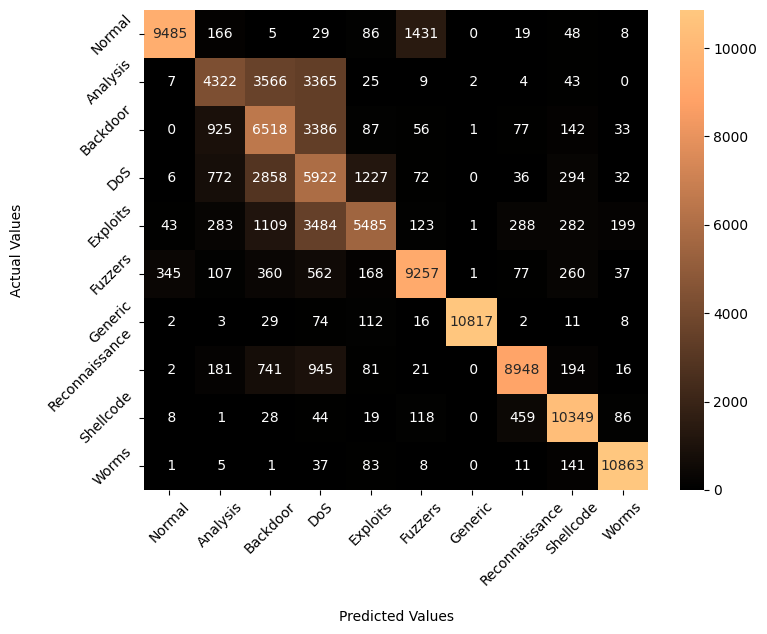

In [14]:
print("Confusion Matrix of Long-Short-Term Memory (LSTM)") 
conf_mat(y_true, predicted_classes)

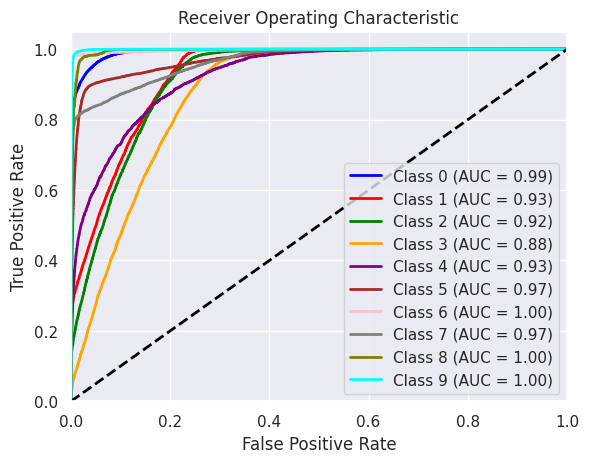

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Compute the AUC and ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_true))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()